In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.data_generator import generate_data_from_csv
from src.train_tree import train_tree
from src.interpret_tree import interpret_tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.tree import plot_tree

In [2]:
feature_names, morph_list, X, y, error_rate = generate_data_from_csv(
    "data/English_pronouns.csv",
    accuracy_rate=0.95,
    n=10000
)

print("Feature names:", feature_names)
print("Unique morphs:", morph_list)
print("Proportion of errors in synthetic data:", error_rate)

Feature names: ['Participant', 'Author', 'Animate', 'Feminine', 'Plural', 'Possessive', 'Subject']
Unique morphs: ['I', 'he', 'her', 'him', 'his', 'it', 'its', 'me', 'my', 'our', 'she', 'their', 'them', 'they', 'us', 'we', 'you', 'your']
Proportion of errors in synthetic data: 0.049


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

clf = train_tree(X_train, y_train, min_imp_dec=0.01)

y_pred = clf.predict(X_test)
print("\nTest macro F1 score:", f1_score(y_test, y_pred, average="macro"))
print("\nClassification report:\n", classification_report(y_test, y_pred))


Test macro F1 score: 0.9464784958803565

Classification report:
               precision    recall  f1-score   support

           I       0.94      0.95      0.95       104
          he       0.94      0.93      0.93        54
         her       0.95      0.94      0.94        93
         him       0.98      0.91      0.94        53
         his       0.94      0.87      0.90        52
          it       0.95      0.97      0.96        96
         its       0.98      0.85      0.91        48
          me       0.98      0.95      0.96        97
          my       0.96      0.96      0.96        92
         our       0.96      0.93      0.94       101
         she       0.98      0.84      0.90        49
       their       0.93      0.97      0.95       147
        them       0.96      0.98      0.97       138
        they       0.96      0.94      0.95       140
          us       0.92      0.95      0.94        88
          we       0.98      0.97      0.98       105
         you   

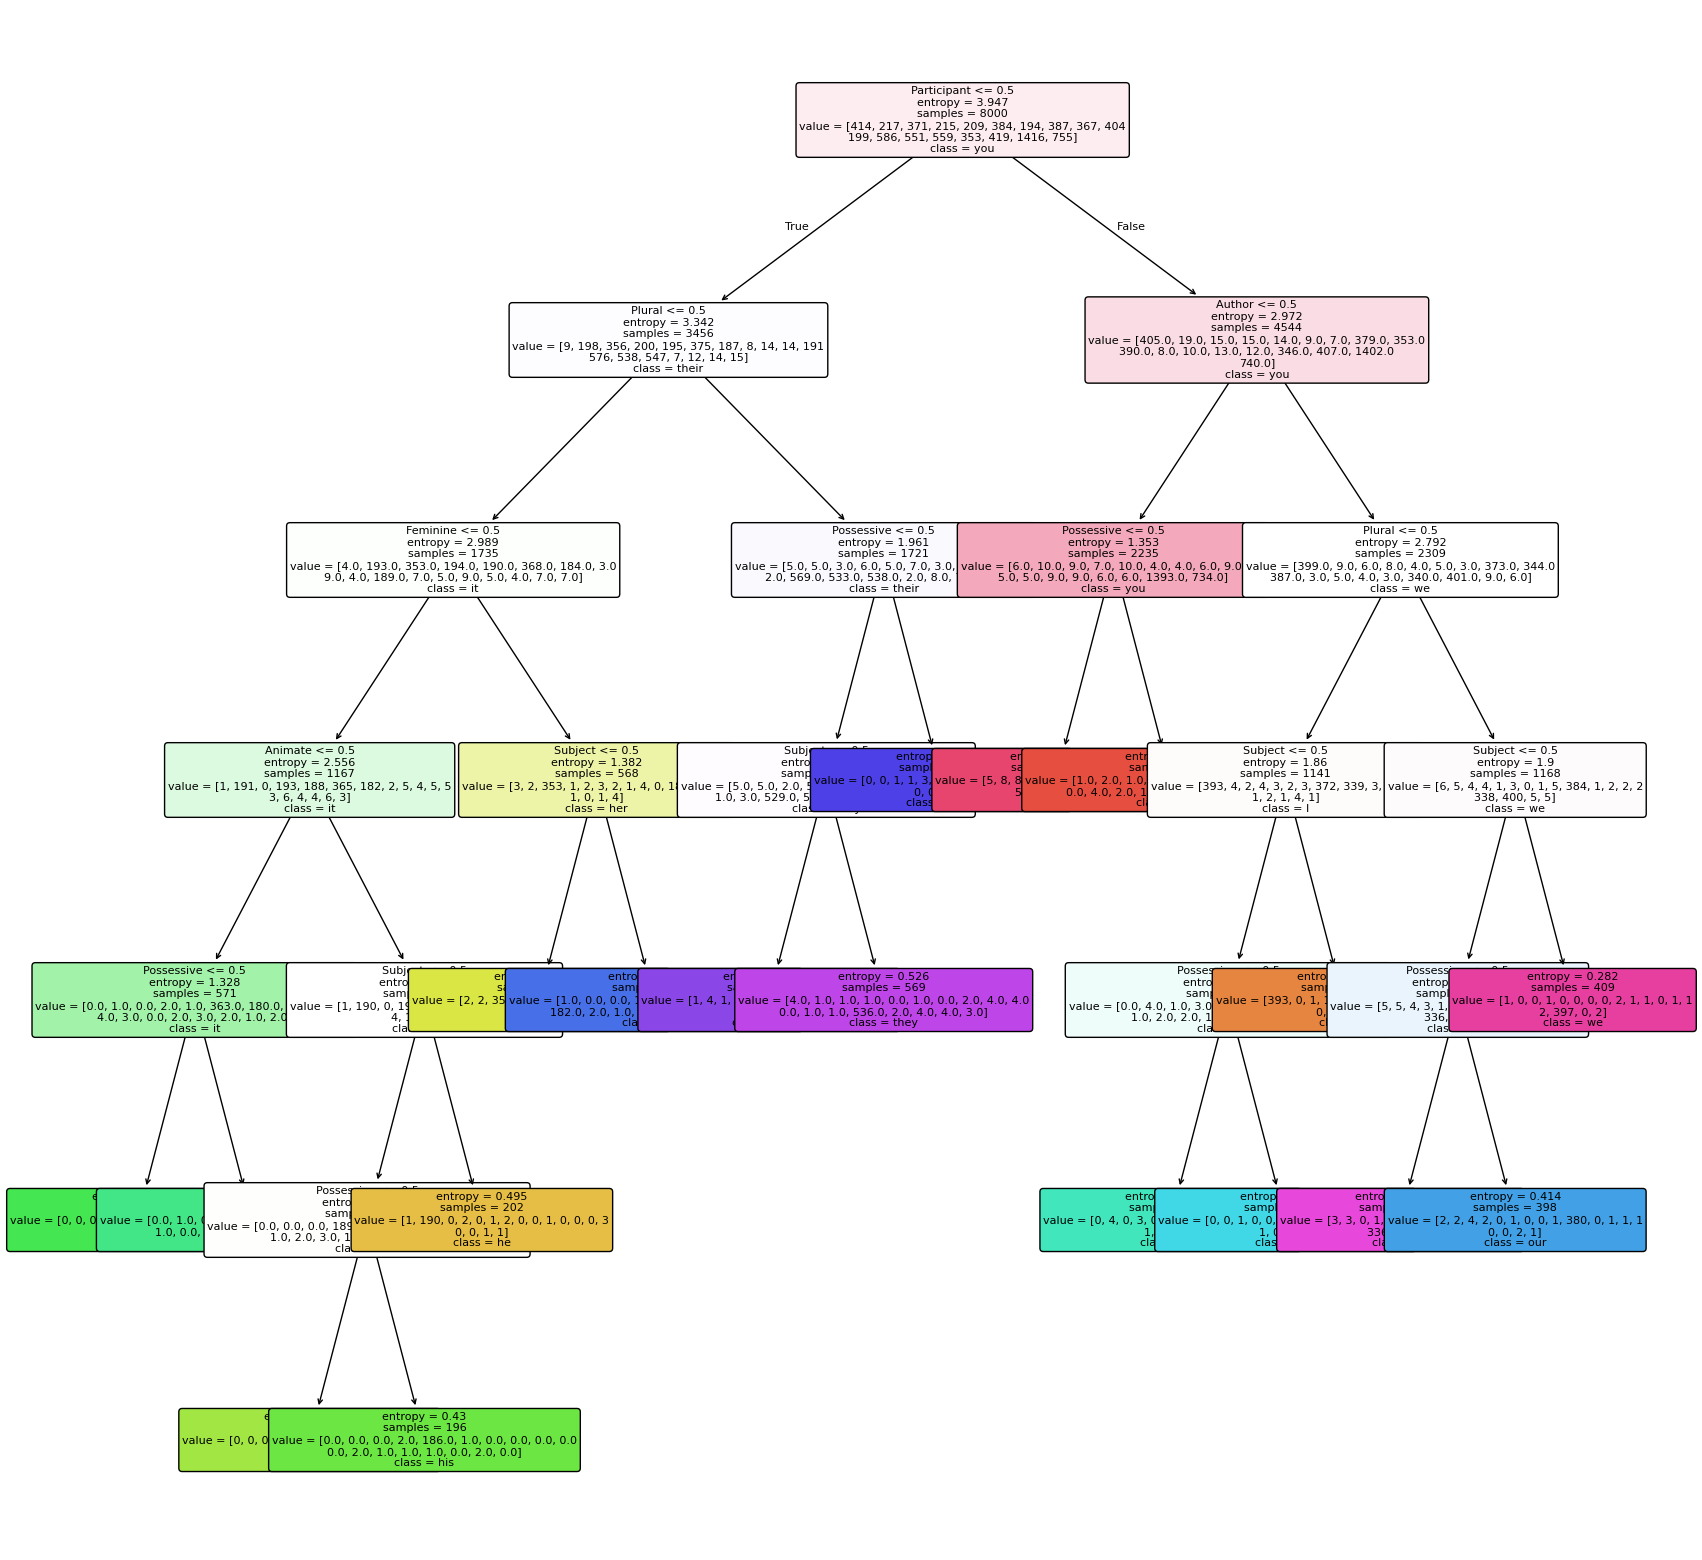

In [4]:
plt.figure(figsize=(20,20))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=np.unique(y),
    filled=True,
    rounded=True,
    fontsize=8,
    impurity=True
)
plt.show()

In [5]:
specifications = interpret_tree(clf, feature_names)

print("Extracted morphological rules:")
for spec in specifications:
    print(spec)

Extracted morphological rules:
[-Participant, -Plural, -Feminine, -Animate, -Possessive] <--> it
[-Participant, -Plural, -Feminine, -Animate, +Possessive] <--> its
[-Participant, -Plural, -Feminine, +Animate, -Subject, -Possessive] <--> him
[-Participant, -Plural, -Feminine, +Animate, -Subject, +Possessive] <--> his
[-Participant, -Plural, -Feminine, +Animate, +Subject] <--> he
[-Participant, -Plural, +Feminine, -Subject] <--> her
[-Participant, -Plural, +Feminine, +Subject] <--> she
[-Participant, +Plural, -Possessive, -Subject] <--> them
[-Participant, +Plural, -Possessive, +Subject] <--> they
[-Participant, +Plural, +Possessive] <--> their
[+Participant, -Author, -Possessive] <--> you
[+Participant, -Author, +Possessive] <--> your
[+Participant, +Author, -Plural, -Subject, -Possessive] <--> me
[+Participant, +Author, -Plural, -Subject, +Possessive] <--> my
[+Participant, +Author, -Plural, +Subject] <--> I
[+Participant, +Author, +Plural, -Subject, -Possessive] <--> us
[+Participant,